## Capstone Project

- As a junior data analyst working in Cyclistics marking analytics team, I am tasked to understand how casual riders and annual members use Cyclistic bikes differently. I will approach this task through the Ask, Prepare, Process, Analyze, Share, and Act phases.

### Ask

- The ask phase requires us to answer related questions that will aid the business task, which in this case is to determine the differences in behaviours between casual members and annual members so that design marketing strategies can be implemented to aid in the conversion of casual members into annual members. This is because, the marketing director and the marketing analysis team have came to the conclusion that an annual membership is much more profitable to the company in comparison to a casual membership.

- The company has provided the data they collected for the past 12 months to help with this business task. I will be using the language R to prepare, process, and analyse this data. I will then use Tableau to share the results to the stakeholders.

### Prepare

- In the prepare phase, we have to first determine if the data is usable by checking its credibility. I did this by going through the "ROCCC" check (Reliable, Original, Comprehensive, Current, and Cited). After verifying that the 12 months of data provided by Motivate International Inc is credible, I then move on to setting up my studio to process the data. As mentioned before, I will be using R for this phase.

- I observed that the data is stored in a ".csv" format (comma seperated values) and that each data set has 13 variables.

### Process

- In this phase, I clean the data by removing all null values, renaming or recoding variables to get more useful data, and format variables to have symmetrical and readable data types.

In [ ]:
# Loading packages
library("dplyr")
library("tidyverse")
library("lubridate")
library("readxl")
library("readr")

In [ ]:
install.packages("modeest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
jan <- read.csv("/content/sample_data/202101-divvy-tripdata.csv")
feb <- read.csv("/content/sample_data/202102-divvy-tripdata.csv")
mar <- read.csv("/content/sample_data/202103-divvy-tripdata.csv")
apr <- read.csv("/content/sample_data/202104-divvy-tripdata.csv")
may <- read.csv("/content/sample_data/202105-divvy-tripdata.csv")
jun <- read.csv("/content/sample_data/202106-divvy-tripdata.csv")
jul <- read.csv("/content/sample_data/202107-divvy-tripdata.csv")
aug <- read.csv("/content/sample_data/202108-divvy-tripdata.csv")
sep <- read.csv("/content/sample_data/202109-divvy-tripdata.csv")
oct <- read.csv("/content/sample_data/202110-divvy-tripdata.csv")
nov <- read.csv("/content/sample_data/202111-divvy-tripdata.csv")
dec <- read.csv("/content/sample_data/202112-divvy-tripdata.csv")
cyclistic_2021 <- rbind(jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)

Next, I take a look at the new data frame to further understand its structure.

In [ ]:
View(cyclistic_2021)
str(cyclistic_2021)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89000,-87.72000,member
DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90000,-87.69000,member
EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90000,-87.70000,member
4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92000,-87.69000,member
BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90000,-87.70000,casual
5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94000,-87.71000,casual
09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,,,41.90039,-87.69676,41.90000,-87.71000,member
DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,,,41.90039,-87.69673,41.91000,-87.70000,member
C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,,,41.90031,-87.69680,41.90000,-87.70000,member


'data.frame':	4906125 obs. of  13 variables:
 $ ride_id           : chr  "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-01-23 16:14:19" "2021-01-27 18:43:08" "2021-01-21 22:35:54" "2021-01-07 13:31:13" ...
 $ ended_at          : chr  "2021-01-23 16:24:44" "2021-01-27 18:47:12" "2021-01-21 22:37:14" "2021-01-07 13:42:55" ...
 $ start_station_name: chr  "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr  "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num  -87.7 -

- Now, I have enough information to know what I want to do with this dataframe. I decide that the started_at and ended_at datatypes being in date & time formats aren't very useful so I recode these variables into new variables.

- I then make a variable called "duration" which tells us the ride length of each user. This will be helpful as I can eventually identify the differences or similarities between annual riders as compared to casual riders.

- Lastly, to reduce clutter in the dataframe, I remove unecessary variables which include started_at & ended_at variables as I have already recoded the date & time data into individual variables. I also removed the start_station_id and end_station_id variables as I plan to use Tableau as a visualization tool, and Tableau can utilize the start and end latitude and longitude to plot a graph of areas with frequent riders.

In [ ]:
# Assuming cyclistic_2021 is your original data frame

# Step 1: Convert date-time columns to the correct format
cyclistic_2021$started_at <- as.POSIXct(cyclistic_2021$started_at, format = "%Y-%m-%d %H:%M:%S")
cyclistic_2021$ended_at <- as.POSIXct(cyclistic_2021$ended_at, format = "%Y-%m-%d %H:%M:%S")

# Step 2: Check for and remove rows with invalid date-time values (NA)
cyclistic_2021 <- cyclistic_2021[complete.cases(cyclistic_2021$started_at, cyclistic_2021$ended_at), ]

# Step 3: Calculate duration in minutes
cyclistic_2021$duration <- difftime(cyclistic_2021$ended_at, cyclistic_2021$started_at, units = "mins")

# Step 4: Create new columns for month, day, year, and day of the week
cyclistic_2021$month <- format(cyclistic_2021$started_at, "%m")
cyclistic_2021$day <- format(cyclistic_2021$started_at, "%d")
cyclistic_2021$year <- format(cyclistic_2021$started_at, "%Y")
cyclistic_2021$day_of_week <- format(cyclistic_2021$started_at, "%A")
cyclistic_2021$day_of_week <- ordered(cyclistic_2021$day_of_week, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Step 5: Remove unnecessary columns
cyclistic_2021 <- cyclistic_2021 %>%
  select(-c(started_at, ended_at, start_station_id, end_station_id))

# Step 6: Remove rows with negative duration (if any)
cyclistic_2021 <- cyclistic_2021[!cyclistic_2021$duration < 0, ]

# Step 7: Remove rows with NA values (if any) from the entire data frame
cyclistic_2021 <- na.omit(cyclistic_2021)


I check the data again after doing more cleaning to make sure everything is how I planned.

In [ ]:
View(cyclistic_2021)
str(cyclistic_2021)

,ride_id,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,month,day,year,day_of_week,duration
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<ord>,<drtn>
1,E19E6F1B8D4C42ED,electric_bike,California Ave & Cortez St,,41.90034,-87.69674,41.89000,-87.72000,member,2021-01-23,2021-01-23,01,23,2021,Saturday,10.4166667 mins
2,DC88F20C2C55F27F,electric_bike,California Ave & Cortez St,,41.90033,-87.69671,41.90000,-87.69000,member,2021-01-27,2021-01-27,01,27,2021,Wednesday,4.0666667 mins
3,EC45C94683FE3F27,electric_bike,California Ave & Cortez St,,41.90031,-87.69664,41.90000,-87.70000,member,2021-01-21,2021-01-21,01,21,2021,Thursday,1.3333333 mins
4,4FA453A75AE377DB,electric_bike,California Ave & Cortez St,,41.90040,-87.69666,41.92000,-87.69000,member,2021-01-07,2021-01-07,01,07,2021,Thursday,11.7000000 mins
5,BE5E8EB4E7263A0B,electric_bike,California Ave & Cortez St,,41.90033,-87.69670,41.90000,-87.70000,casual,2021-01-23,2021-01-23,01,23,2021,Saturday,0.7166667 mins
6,5D8969F88C773979,electric_bike,California Ave & Cortez St,,41.90041,-87.69676,41.94000,-87.71000,casual,2021-01-09,2021-01-09,01,09,2021,Saturday,53.7833333 mins
7,09275CC10F854E9E,electric_bike,California Ave & Cortez St,,41.90039,-87.69676,41.90000,-87.71000,member,2021-01-04,2021-01-04,01,04,2021,Monday,5.5833333 mins
8,DF7A32A217AEFB14,electric_bike,California Ave & Cortez St,,41.90039,-87.69673,41.91000,-87.70000,member,2021-01-14,2021-01-14,01,14,2021,Thursday,6.6666667 mins
9,C2EFC62379EB716C,electric_bike,California Ave & Cortez St,,41.90031,-87.69680,41.90000,-87.70000,member,2021-01-09,2021-01-09,01,09,2021,Saturday,2.5166667 mins


'data.frame':	4902140 obs. of  16 variables:
 $ ride_id           : chr  "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ start_station_name: chr  "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...
 $ start_date        : Date, format: "2021-01-23" "2021-01-27" ...
 $ end_date          : Date, format: "2021-01-23" "2021-01-27" ...
 $ month             : chr  "01" "01" "01" "01" ...
 $ day               : chr  "23" "27" "21" "07" ...
 $ year        

### Analyze

In the analyze phase, we analyze the data to help achieve our business task. Thus, I have analyzed the cleaned data to further understand the behaviours and characteristics of casual riders as compared to annual members and come up with a data-driven conclusion to present to the stakeholders.

In [ ]:
summary(cyclistic_2021)

   ride_id          rideable_type      start_station_name end_station_name  
 Length:4902140     Length:4902140     Length:4902140     Length:4902140    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   start_lat       start_lng         end_lat         end_lng      
 Min.   :41.64   Min.   :-87.84   Min.   :41.39   Min.   :-88.97  
 1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88   1st Qu.:-87.66  
 Median :41.90   Median :-87.64   Median :41.90   Median :-87.64  
 Mean   :41.90   Mean   :-87.65   Mean   :41.90   Mean   :-87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93  

First, I check the average ride duration in days of riders (regardless of their type).

In [ ]:
mean(cyclistic_2021$end_date - cyclistic_2021$start_date)

Time difference of 0.007954893 days

Next, I aggregate the data between ride frequency and membership type to further understand the differences between the casual and annual riders

#### Aggregation of Ride Frequency vs Membership Type

In [ ]:
# Define a custom mode function (mfv) to calculate mode
mfv <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Aggregate using mean duration
aggregate(cyclistic_2021$duration ~ cyclistic_2021$member_casual, FUN = mean)

# Aggregate using median duration
aggregate(cyclistic_2021$duration ~ cyclistic_2021$member_casual, FUN = median)

# Aggregate using mode of day_of_week
aggregate(cyclistic_2021$day_of_week ~ cyclistic_2021$member_casual, FUN = mfv)

# Aggregate using mode of month
aggregate(cyclistic_2021$month ~ cyclistic_2021$member_casual, FUN = mfv)

# Aggregate using maximum duration
aggregate(cyclistic_2021$duration ~ cyclistic_2021$member_casual, FUN = max)

# Aggregate using minimum duration
aggregate(cyclistic_2021$duration ~ cyclistic_2021$member_casual, FUN = min)

# Aggregate using mean duration for each member_casual and day_of_week combination
aggregate(cyclistic_2021$duration ~ cyclistic_2021$member_casual + cyclistic_2021$day_of_week, FUN = mean)


cyclistic_2021$member_casual,cyclistic_2021$duration
<chr>,<drtn>
casual,30.59751 mins
member,13.28089 mins


cyclistic_2021$member_casual,cyclistic_2021$duration
<chr>,<drtn>
casual,15.91667 mins
member,9.55000 mins


cyclistic_2021$member_casual,cyclistic_2021$day_of_week
<chr>,<ord>
casual,Saturday
member,Wednesday


cyclistic_2021$member_casual,cyclistic_2021$month
<chr>,<chr>
casual,07
member,10


cyclistic_2021$member_casual,cyclistic_2021$duration
<chr>,<drtn>
casual,55944.150 mins
member,1499.933 mins


cyclistic_2021$member_casual,cyclistic_2021$duration
<chr>,<drtn>
casual,0 mins
member,0 mins


cyclistic_2021$member_casual,cyclistic_2021$day_of_week,cyclistic_2021$duration
<chr>,<ord>,<drtn>
casual,Sunday,35.74283 mins
member,Sunday,15.19937 mins
casual,Monday,30.58031 mins
member,Monday,12.85927 mins
casual,Tuesday,26.91350 mins
member,Tuesday,12.49693 mins
casual,Wednesday,26.40601 mins
member,Wednesday,12.55599 mins
casual,Thursday,25.93555 mins


#### Arranging membership status and ride duration according to days of the week (week day)

In [ ]:
cyclistic_2021 %>%
  mutate(weekday = wday(start_date, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n(),average_duration = mean(duration)) %>%
  arrange(member_casual, weekday)
count(cyclistic_2021, "ride_id")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<drtn>
casual,Sun,415336,35.74283 mins
casual,Mon,244476,30.58031 mins
casual,Tue,233322,26.91350 mins
casual,Wed,236384,26.40601 mins
casual,Thu,239529,25.93555 mins
casual,Fri,309043,29.05433 mins
casual,Sat,480706,33.32501 mins
member,Sun,335435,15.19937 mins
member,Mon,373616,12.85927 mins


"""ride_id""",n
<chr>,<int>
ride_id,4902140


- After analyzing the data, I now see that the average duration for both members and casual riders are highest on weekends (Saturday & Sunday).
- I also notice the average duration time for casual riders is always significantly longer than that of members. This tells me that casual riders more likely to use their rides for leisure purposes whereas members probably use their rides to commute to work or someplace regularly as a routine.

### Share

In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving Share_4.png to Share_4.png
Saving Share_3.png to Share_3.png
Saving Share_2.png to Share_2.png
Saving Share_1.png to Share_1.png


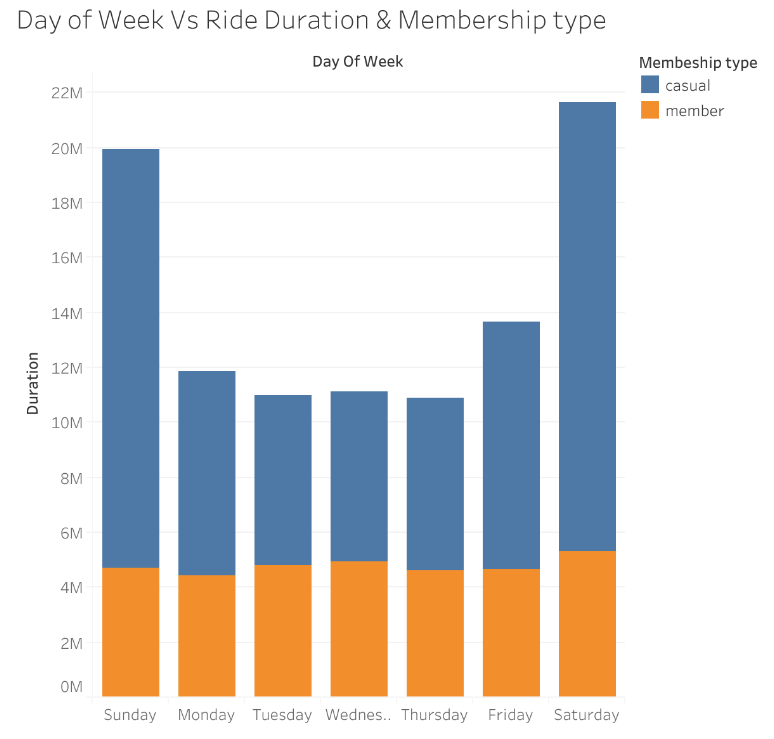

In [4]:
Image('Share_1.png', width= 525)

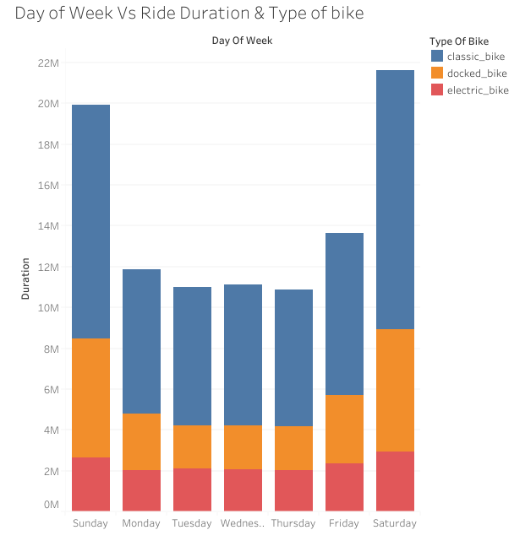

In [6]:
Image('Share_2.png', width= 525)

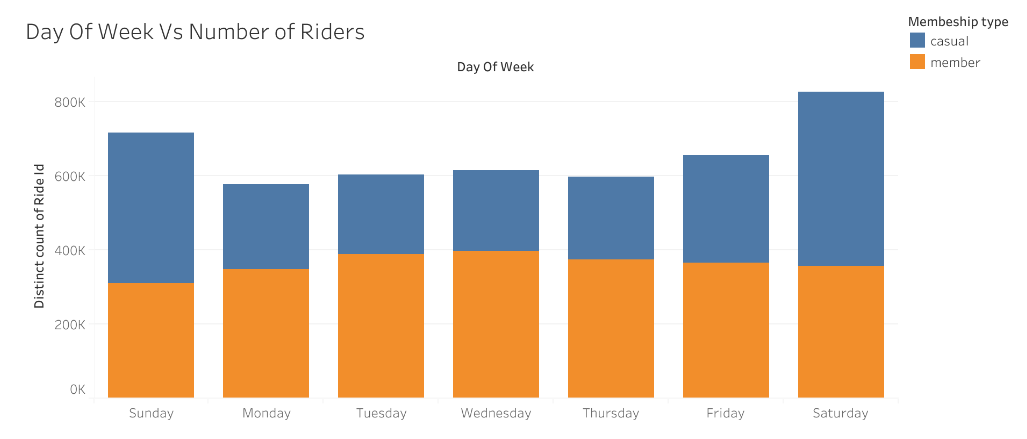

In [7]:
Image('Share_3.png', width= 525)

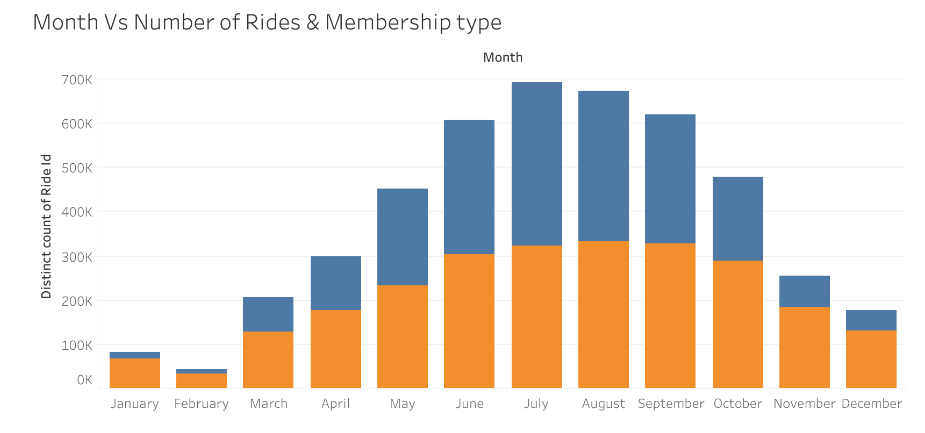

In [8]:
Image('Share_4.png', width= 525)

- Firstly, I found that casual riders tend to have an average ride length (duration) of 29 minutes as compared to annual members who have an average ride length of about 13 minutes. This tells us that the average ride length of a casual rider is about 2.2x longer than that of an annual member. This, as proposed earlier, could be due to the differences in usage of these rides. Casual riders probably use these rides for leisure or tourist purposes (will be explained later), whereas members probably use their rides to get to a specific destination routinely (explaining their shorter ride lengths).

- As seen in the Tableau visualizations, the highest day in which rides are taken (both casual and annual members) are on Sundays, followed by Saturdays. This could be due to the fact most people don't work on the weekends which allows them to have leisure time with their family. Additionally, the visualization also shows us that during the summer months, ride times for casual users spike drastically which tells us that it is a popular choice for tourists visiting in the summer. We also can see that the casual riders decrease to nearly zero during the winter months.

- In terms of bike preferences, the classic bike is the most favoured bike accross the board, followed by the docked bike and lastly the electric bike.

### Act

In the Act phase, I am tasked to come up with my top three recomendations based on my analysis.

1) I would recommend that a weekend pass be implemented as the data suggests users spend more time on the bikes during the weekend and the frequency of rides are higher.

2) A summer membership would be beneficial as tourists could tour the city of Chicago during their visits. This would convert the bulk of casual riders who use the bikes in the summer months.

3) The classic bikes should be more readily availble as it seems to be preferred by both member types. The electric bikes should be removed, redesigned, or revamped as its usage seems dissapointing in this modern era.